In [1]:
pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Step 1: Load all four datasets
adults = pd.read_csv('arrests_national_adults.csv')
juvenile = pd.read_csv('arrests_national_juvenile.csv')
drugs = pd.read_csv('arrests_national_drug.csv')  # Not directly used
national = pd.read_csv('arrests_national.csv')    # Not directly used

In [3]:
# Step 2: Prepare Adults and Juveniles datasets
# Add a new column to indicate age group
adults['age_group'] = 'Adult'
juvenile['age_group'] = 'Juvenile'

In [4]:
# Step 3: Align and Merge Adults and Juveniles
common_cols = list(set(adults.columns) & set(juvenile.columns))
adults_aligned = adults[common_cols]
juvenile_aligned = juvenile[common_cols]
combined_df = pd.concat([adults_aligned, juvenile_aligned], ignore_index=True)

In [5]:
# Step 4: Data Cleaning
# Drop irrelevant columns
combined_df_cleaned = combined_df.drop(columns=['id', 'state_abbr', 'offense_code'])

In [6]:
# Fill missing race values with 0
race_columns = ['white', 'black', 'asian_pacific_islander', 'american_indian']
combined_df_cleaned[race_columns] = combined_df_cleaned[race_columns].fillna(0)

In [7]:
# Fill any other missing numeric values with 0
numeric_cols = combined_df_cleaned.select_dtypes(include=['float64', 'int64']).columns
combined_df_cleaned[numeric_cols] = combined_df_cleaned[numeric_cols].fillna(0)

In [8]:
# Step 5: Prepare X and y
X = combined_df_cleaned.drop(columns=['offense_name'])
y = combined_df_cleaned['offense_name']

In [9]:
# Step 6: Encode 'age_group' (categorical feature)
X = pd.get_dummies(X, columns=['age_group'], drop_first=True)

In [10]:

# Step 7: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
# Step 8: Random Forest Model Training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Step 9: Predictions and Evaluation
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy of Random Forest Model: {accuracy:.2%}")
print("\nClassification Report:\n")
print(class_report)

Accuracy of Random Forest Model: 94.01%

Classification Report:

                                          precision    recall  f1-score   support

                      Aggravated Assault       0.82      1.00      0.90         9
                      All Other Offenses       0.90      1.00      0.95         9
                                   Arson       1.00      1.00      1.00         9
                                Burglary       0.90      1.00      0.95         9
     Curfew and Loitering Law Violations       1.00      0.40      0.57         5
                      Disorderly Conduct       0.82      1.00      0.90         9
               Drive Under the Influence       0.90      1.00      0.95         9
                   Drug Abuse Violations       1.00      0.90      0.95        10
                             Drunkenness       1.00      0.90      0.95        10
                            Embezzlement       0.90      1.00      0.95         9
              Forgery and Counte

In [13]:
# Step 10: Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

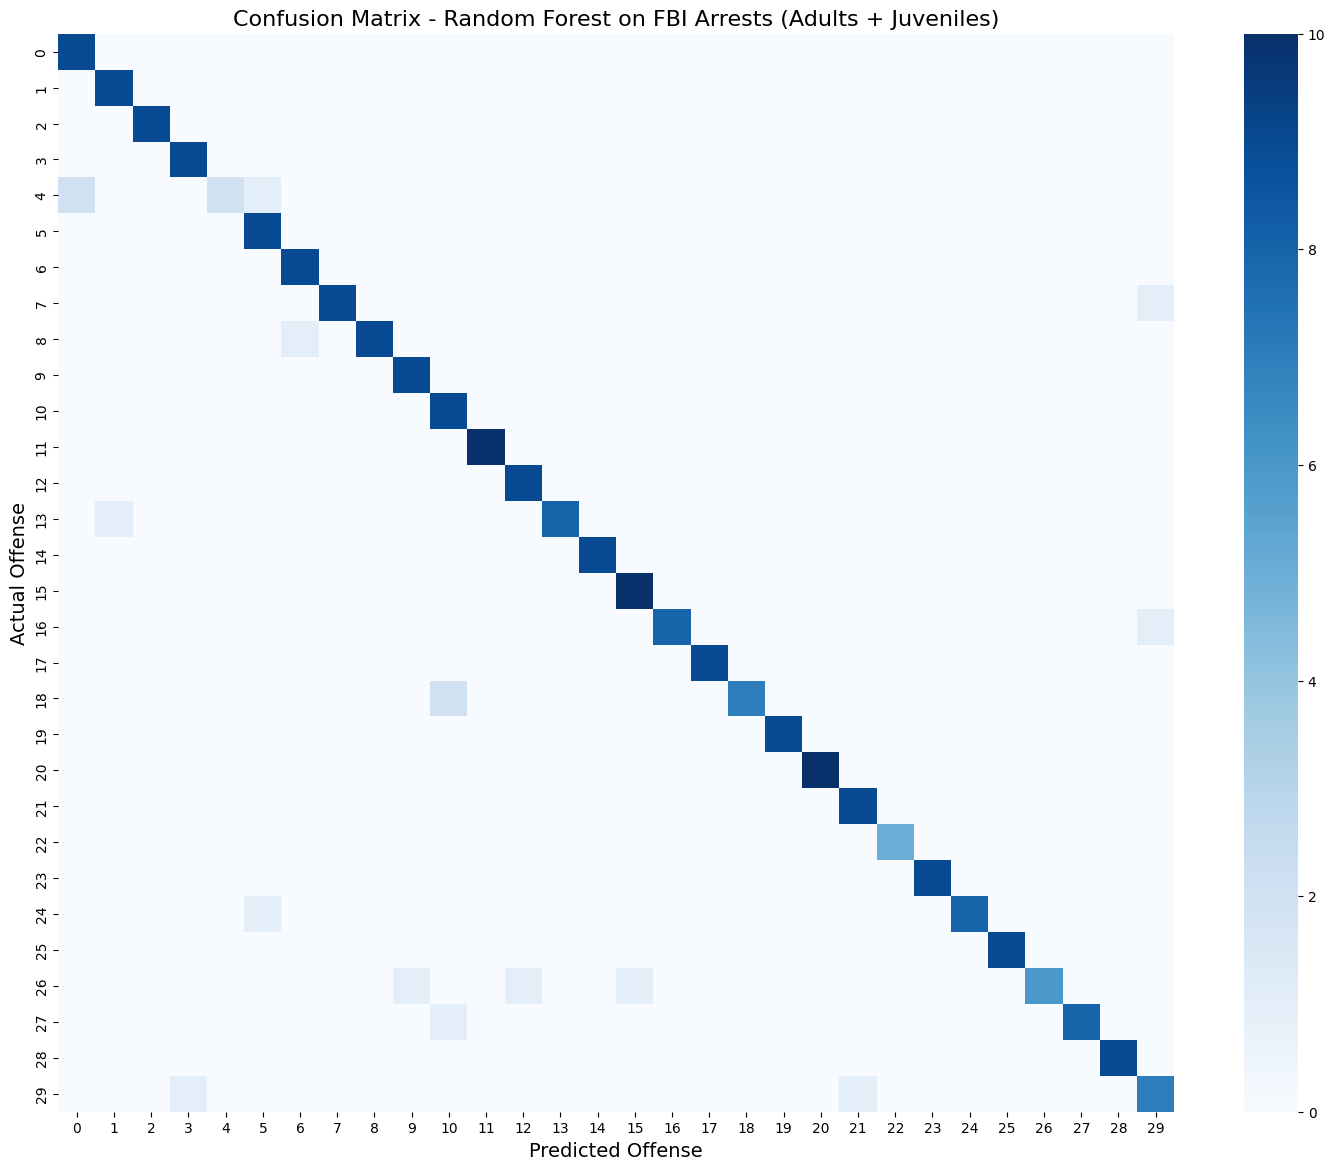

In [14]:
# Plot Confusion Matrix
plt.figure(figsize=(18, 14))
sns.heatmap(conf_matrix, annot=False, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest on FBI Arrests (Adults + Juveniles)', fontsize=16)
plt.xlabel('Predicted Offense', fontsize=14)
plt.ylabel('Actual Offense', fontsize=14)
plt.show()

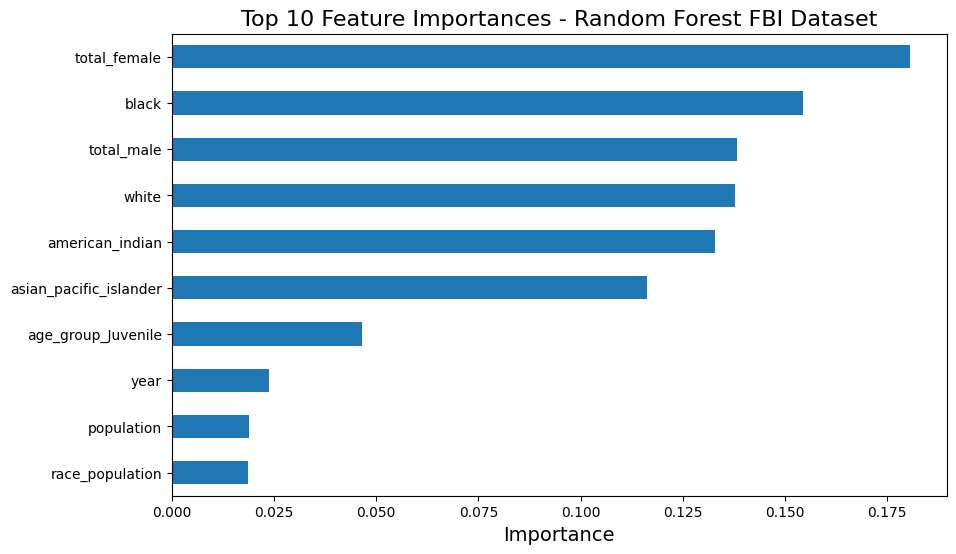

In [15]:
# Plot Top 10 Feature Importances
plt.figure(figsize=(10, 6))
feature_importances.head(10).plot(kind='barh')
plt.title('Top 10 Feature Importances - Random Forest FBI Dataset', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.gca().invert_yaxis()
plt.show()

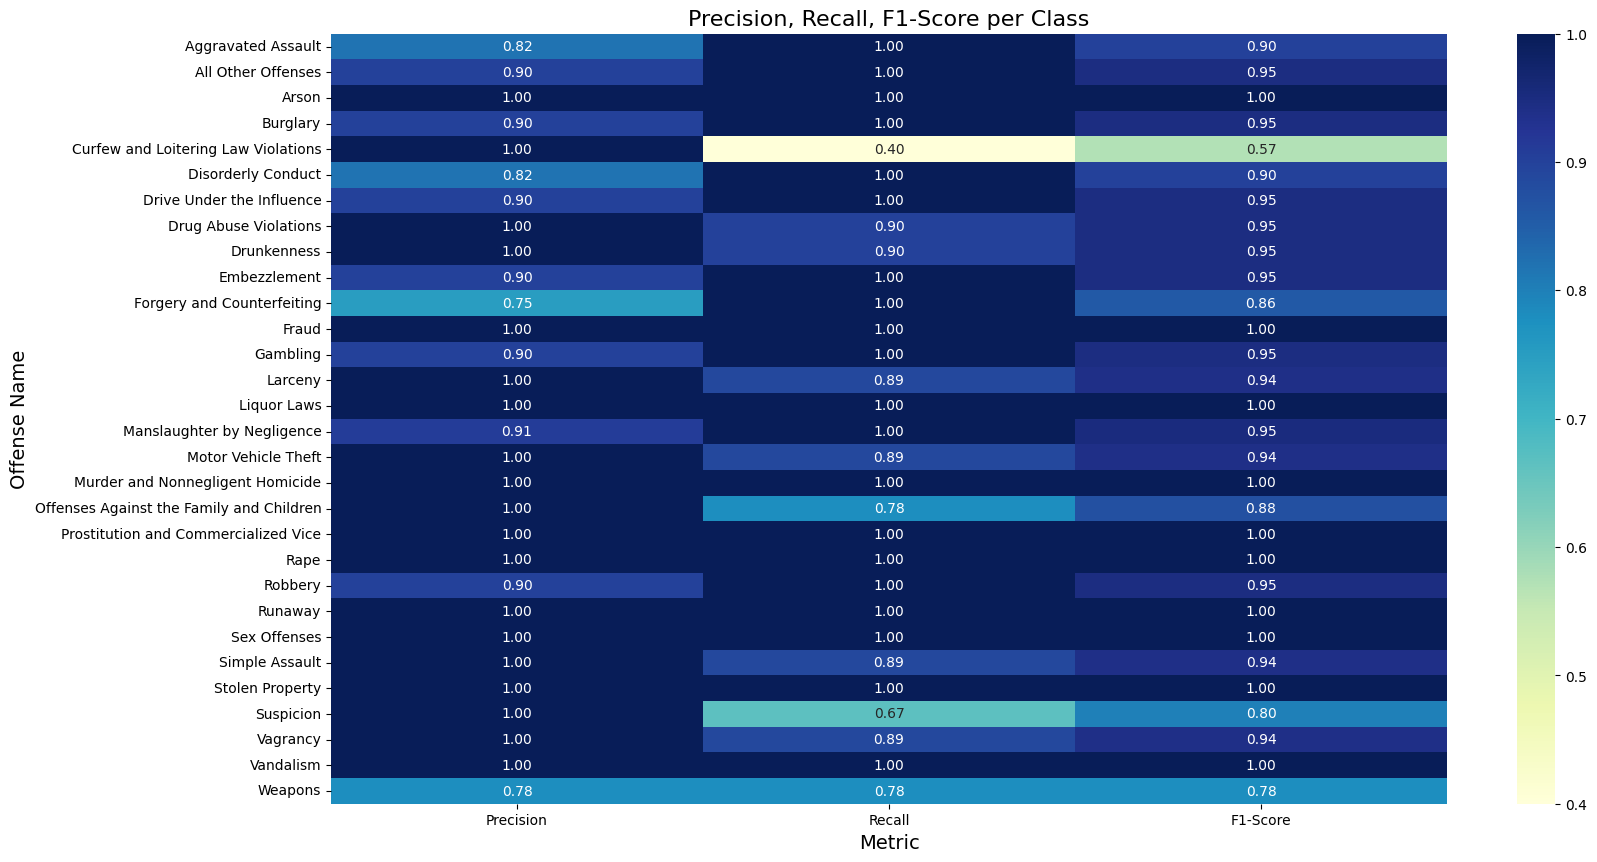

In [16]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

# Build dataframe from classification report
report_data = precision_recall_fscore_support(y_test, y_pred, zero_division=0)
precision, recall, f1_score, _ = report_data

report_df = pd.DataFrame({
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score
}, index=rf_model.classes_)

plt.figure(figsize=(18, 10))
sns.heatmap(report_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Precision, Recall, F1-Score per Class', fontsize=16)
plt.xlabel('Metric', fontsize=14)
plt.ylabel('Offense Name', fontsize=14)
plt.show()

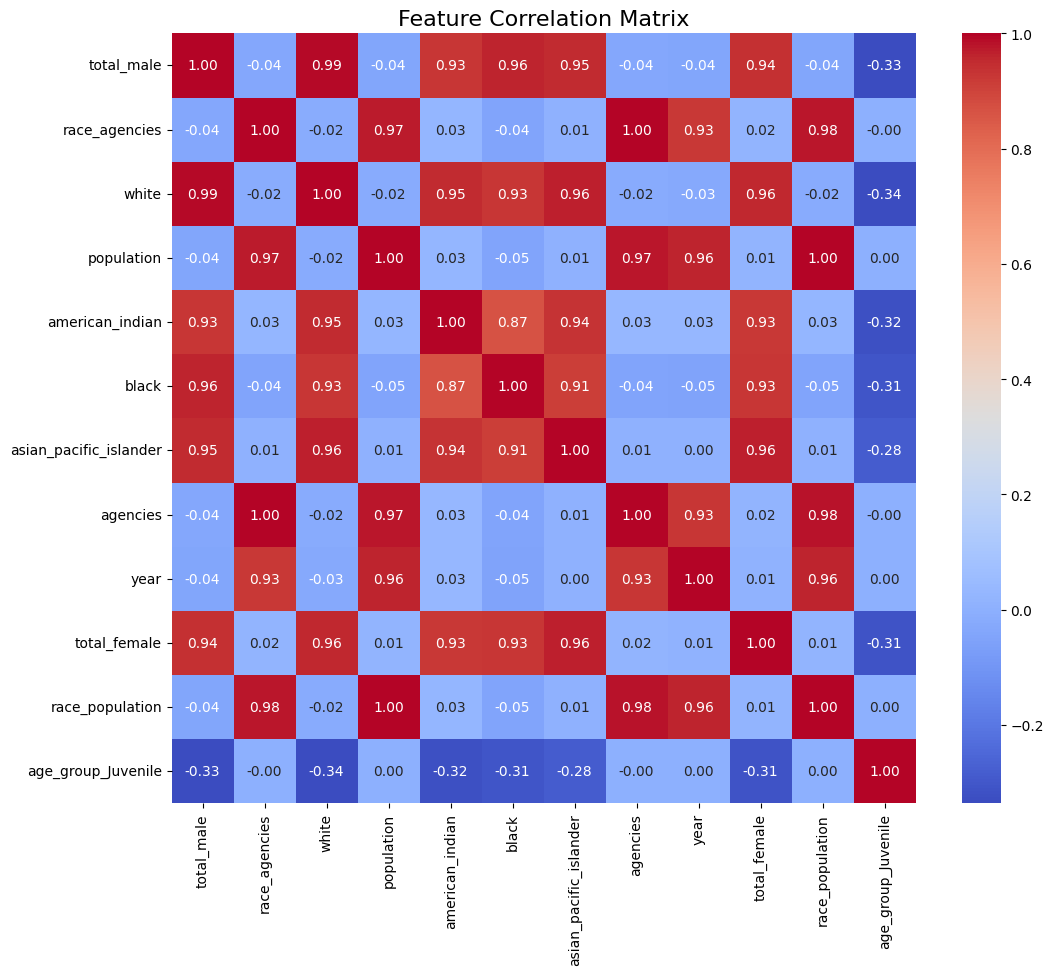

In [17]:
# Feature Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix', fontsize=16)
plt.show()

LOGISTIC REGRESSION MODEL

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

/Users/jagruti/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/jagruti/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [19]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Train the Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=3000)
model.fit(X_train_scaled, y_train)

/Users/jagruti/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=3000, multi_class='multinomial')

In [21]:
# Predict on test set
y_pred = model.predict(X_test_scaled)

In [22]:
# Evaluation: Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
                                           precision    recall  f1-score   support

                      Aggravated Assault       0.75      0.33      0.46         9
                      All Other Offenses       1.00      1.00      1.00         9
                                   Arson       0.00      0.00      0.00         9
                                Burglary       0.38      0.33      0.35         9
     Curfew and Loitering Law Violations       0.00      0.00      0.00         5
                      Disorderly Conduct       0.75      1.00      0.86         9
               Drive Under the Influence       0.62      0.56      0.59         9
                   Drug Abuse Violations       1.00      0.80      0.89        10
                             Drunkenness       0.33      0.20      0.25        10
                            Embezzlement       0.00      0.00      0.00         9
              Forgery and Counterfeiting       0.20      0.11      0.14  

/Users/jagruti/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jagruti/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jagruti/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

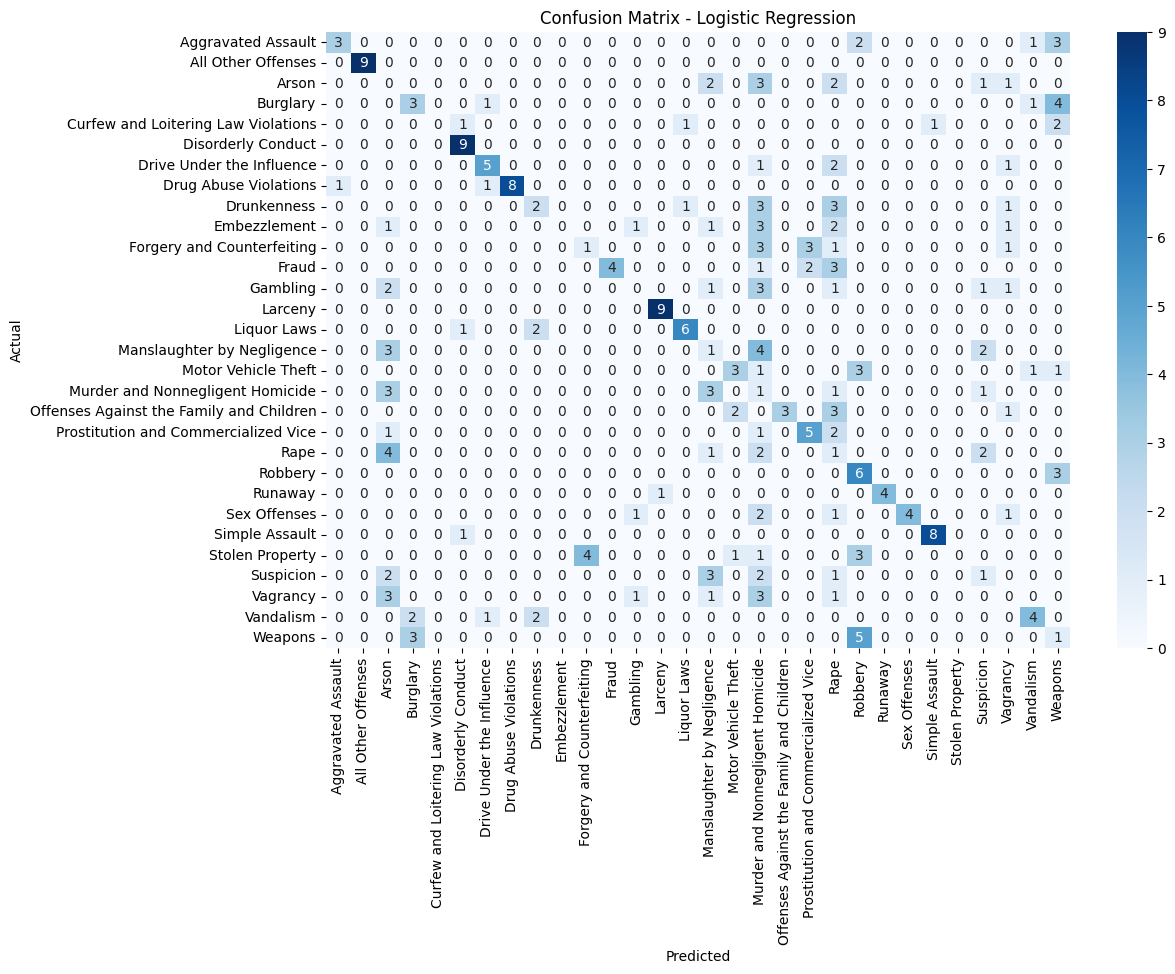

In [23]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/Users/jagruti/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jagruti/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jagruti/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

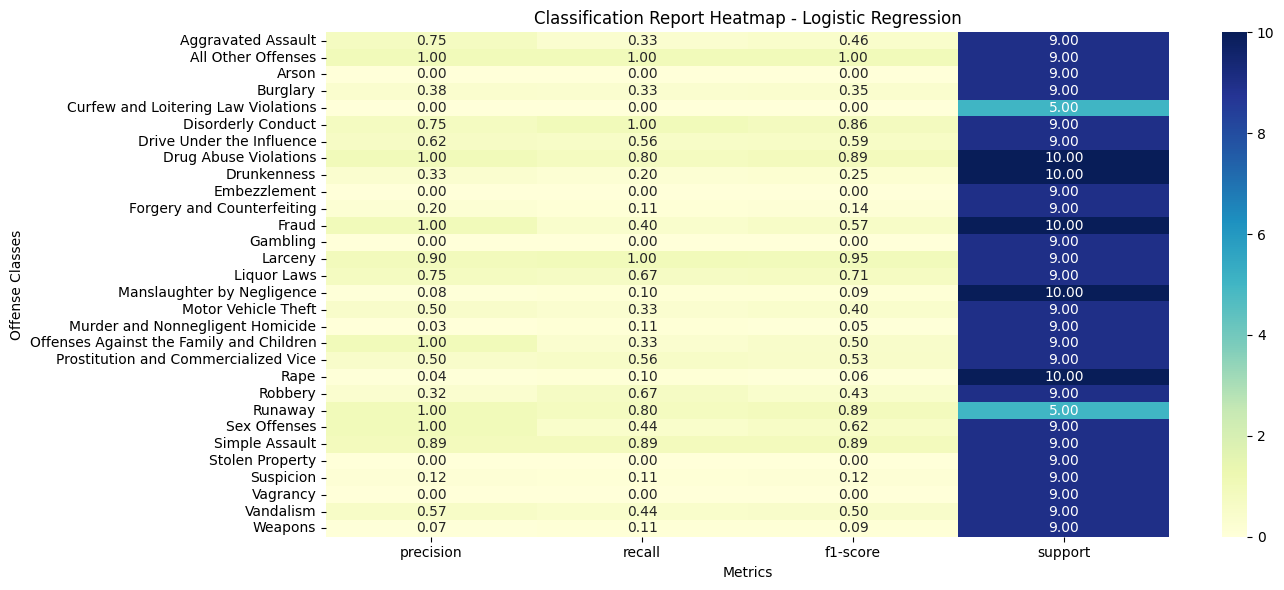

In [28]:
# Generate classification report as dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame
df_report = pd.DataFrame(report).transpose()

# Drop 'accuracy', 'macro avg', and 'weighted avg' rows if needed
df_display = df_report.iloc[:-3, :]

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(df_display, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report Heatmap - Logistic Regression")
plt.xlabel("Metrics")
plt.ylabel("Offense Classes")
plt.tight_layout()
plt.show()

Feature importance of Random Forest

/var/folders/yh/q29t0rh92yq9ns3kfy5329gw0000gn/T/ipykernel_55998/1872292467.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices[:10]], y=features[indices[:10]], palette='viridis')


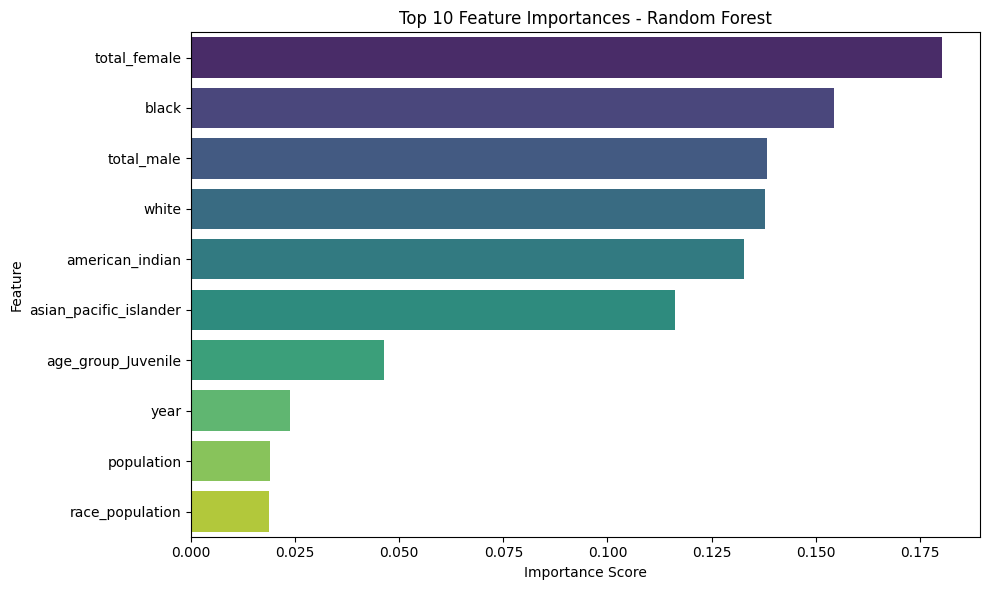

In [24]:
importances = rf_model.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

# Top 10 features
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices[:10]], y=features[indices[:10]], palette='viridis')
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Logistic Regression Coefficients

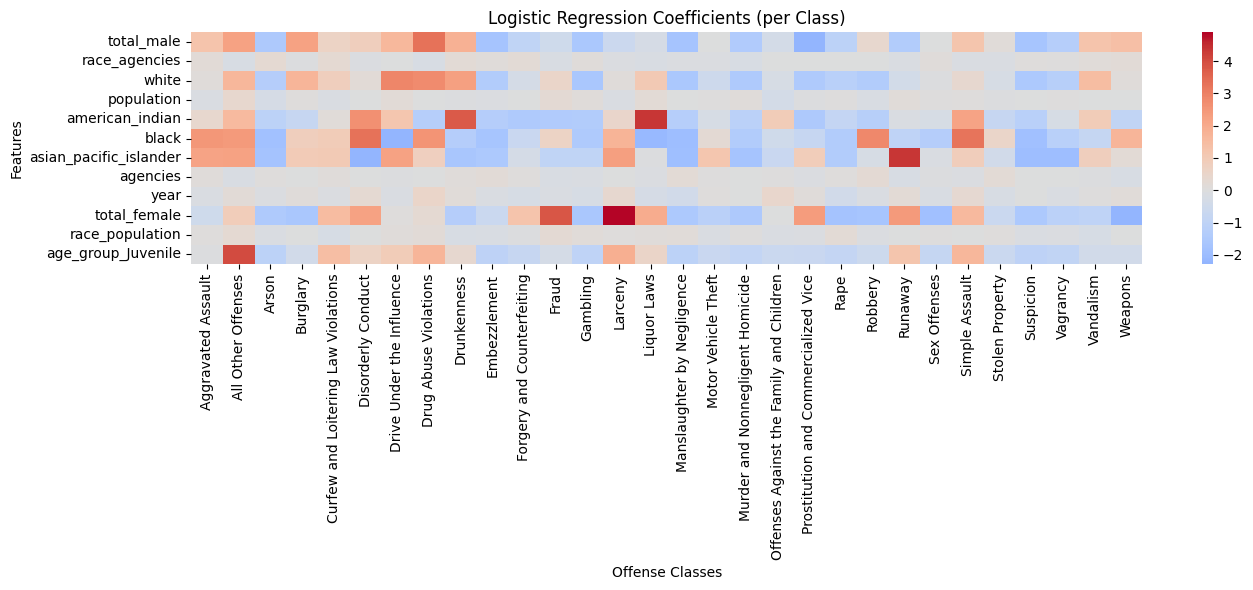

In [25]:
coef_df = pd.DataFrame(model.coef_, columns=X_train.columns, index=model.classes_)
plt.figure(figsize=(14, 6))
sns.heatmap(coef_df.T, cmap="coolwarm", center=0)
plt.title("Logistic Regression Coefficients (per Class)")
plt.xlabel("Offense Classes")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

Comparison Bar Plot: Accuracy and F1 Score

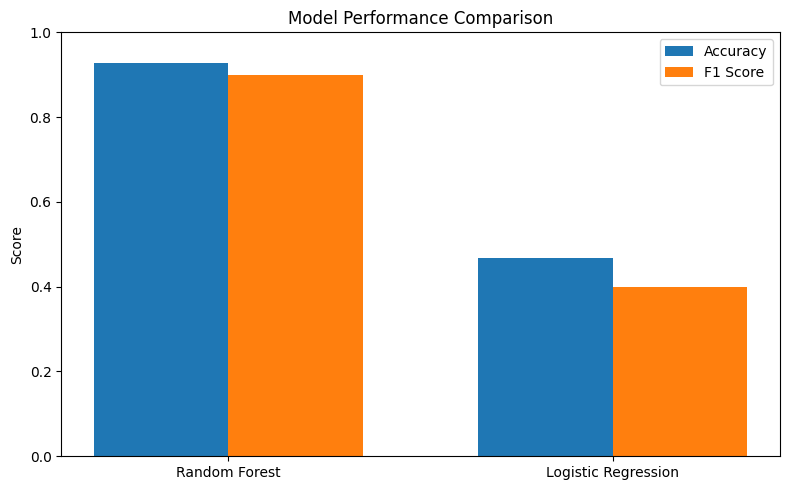

In [26]:
models = ['Random Forest', 'Logistic Regression']
accuracy = [0.9288, 0.467]
f1_score = [0.90, 0.40]

plt.figure(figsize=(8, 5))
x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, accuracy, width, label='Accuracy')
plt.bar(x + width/2, f1_score, width, label='F1 Score')

plt.xticks(x, models)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.tight_layout()
plt.show()